<a href="https://colab.research.google.com/github/NorpajSucces/Submission-Membangun-Proyek-Machine-Learning-IDCAMPxDicoding/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Zhafran_Pradistyatama_Kuncoro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/NorpajSucces/Submission-Membangun-Proyek-Machine-Learning-IDCAMPxDicoding/main/dataset/clustered_data.csv')

df.head()

,Customer ID,Age,Gender,Annual Income,Spending Score,Cluster,Gender_Encoded
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,-1.145516,Male,0.798813,1.337059,2,1
1,1770b26f-493f-46b6-837f-4237fb5a314e,0.180335,Female,1.442076,1.545929,4,0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,0.369742,Female,-0.743208,0.884507,1,0
3,9795712a-ad19-47bf-8886-4f997d6046e3,-1.476979,Male,-1.038953,0.223086,0,1
4,64139426-2226-4cd6-bf09-91bce4b4db5e,-1.429627,Male,0.842317,0.884507,2,1


In [7]:
df.head()

,Age,Gender,Annual Income,Spending Score,Cluster,Gender_Encoded
0,-1.145516,Male,0.798813,1.337059,2,1
1,0.180335,Female,1.442076,1.545929,4,0
2,0.369742,Female,-0.743208,0.884507,1,0
3,-1.476979,Male,-1.038953,0.223086,0,1
4,-1.429627,Male,0.842317,0.884507,2,1


In [8]:
df.tail()

,Age,Gender,Annual Income,Spending Score,Cluster,Gender_Encoded
15074,-1.192868,Female,-0.230056,-0.716828,0,0
15075,-1.524331,Male,-0.696335,0.814884,1,1
15076,-1.713738,Female,0.049650,-0.090218,2,0
15077,-1.334923,Female,-0.295341,-1.587119,0,0
15078,-1.666386,Male,-0.606685,-1.691554,0,1


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X = df[['Age', 'Annual Income', 'Spending Score']]
y = df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [12]:
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='ovr')

In [14]:
y_pred = model.predict(X_test)


Logistic Regression merupakan algoritma yang powerful dan mudah diinterpretasi untuk tugas klasifikasi. Dalam proyek ini, Logistic Regression digunakan untuk memprediksi cluster pelanggan dan memberikan wawasan berharga bagi bisnis. Meskipun memiliki beberapa kekurangan, Logistic Regression tetap menjadi pilihan yang populer karena kemudahan penggunaan dan kemampuannya dalam memberikan hasil yang baik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [15]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9650751547303271

In [18]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' untuk multi-kelas
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Menampilkan hasil
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1-Score: 0.96


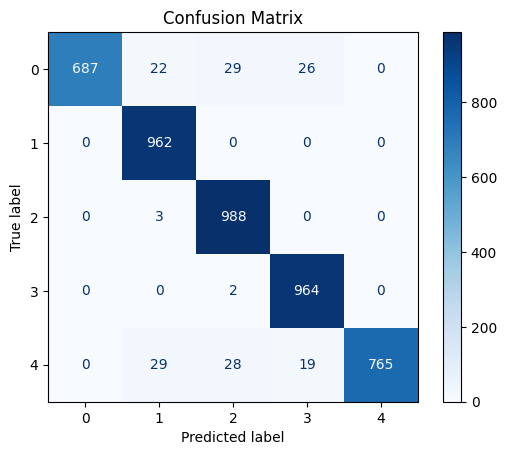

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Menurut saya tidak mengalami underfitting atau overfitting, karena akurasi nya cukup besar, hampir mendekati 1. Akan tetapi saya masih bingung dengan hasil Silhoutte scorenya saat clustering. Hanya mendapatkan angka 0.29 sudah saya ubah dibagian jumlah clusternya, tapi paling bagus di 0.29.**

**Mungkin karena datanya terlalu banyak dan ini pertama kali saya melakukan ini dengan data yang banyak. Saya masih bingung data ini harus digimanakan. Terimakasih**